In [4]:
import numpy  as np
import pandas as pd
import gc
import pprint
import hashlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

In [108]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df.sort_values(by="Nome") )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gscouts.sample(5))
display(gmercado.sample(5))
display(gpos.sample(5))

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7240,Abel Braga (TEC),Internacional,11.46,16.0,3.78,4.74,0.73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6793,Abel Braga (TEC),Internacional,11.31,14.0,3.96,3.14,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
6213,Abel Braga (TEC),Internacional,11.71,11.0,4.11,7.06,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31,2020,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8622,Abel Braga (TEC),Flamengo,10.28,4.0,3.58,4.30,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
8840,Abel Braga (TEC),Flamengo,10.53,5.0,3.82,4.79,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,2019,NaN,NaN,89fcd561730cbd9cb19995a7106a268ed2bb8a1e,TEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,Éverson (GOL),Santos,9.79,23.0,4.25,8.00,-0.06,NaN,NaN,NaN,...,20.0,1.0,NaN,NaN,29,2019,NaN,34.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
10828,Éverson (GOL),Santos,8.62,8.0,4.36,6.20,1.45,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,14,2019,NaN,7.0,6d99fcc3bc6b30aced0353e17beee4f211c2ee4a,GOL
7848,Ênio (MEI),Botafogo,0.85,4.0,1.35,-0.20,-0.53,2.0,NaN,NaN,...,NaN,1.0,1.0,12.0,38,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI
7589,Ênio (MEI),Botafogo,1.38,3.0,1.87,3.10,0.32,2.0,NaN,NaN,...,NaN,NaN,1.0,3.0,37,2020,NaN,NaN,98db7cfc8e99fe42e23ab3d1f8b9359815e9c023,MEI


,id,ano,DS_sum,G_sum,A_sum,SG_sum,FS_sum,FF_sum,FD_sum,FT_sum,...,GC_sum,CV_sum,CA_sum,PP_sum,GS_sum,FC_sum,I_sum,PI_sum,RB_sum,PE_sum
672,8503a68c00b8da9a7a8c757a25d5efb8e10e05e2,2020,0.0,1.0,0.0,0.0,6.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,4.0,7.0,0.0,0.0
1199,eef1739f8210742b2e78774ba6fbe4e5a7ff3ecf,2019,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,8.0,8.0
121,131172853b1823a7017a02fa5768548c33959238,2019,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0
5,00bb6950552b01c385f1f763a7f475f311f9baf4,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
900,b27456debbb763e4f116a386ca16fd0e87bd4679,2020,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,48.0,3.0,0.0,315.0,0.0,0.0


,id,ano,Preço_sum,Média_sum,Variação_sum
770,9cd71ee63111f28f92a77b7c34b9c0bf8e6b242b,2019,99.44,44.55,4.88
454,5a2bfe120db7d667e0d07751de79d083e0a95eca,2020,102.75,42.42,6.85
1063,d6cf8deab9740b85119d4e85b6fce995d6763089,2019,3.08,1.48,-0.32
771,9cd71ee63111f28f92a77b7c34b9c0bf8e6b242b,2020,46.45,11.29,0.37
310,3a26ed95a7e47feec36be8b2b86797f75d4f2d57,2019,17.07,7.16,0.22


,id,ano,pos_first
268,3216f76537a923f901ca7f02f22bf47a4f2cc002,2020,MEI
437,5566b9519cb3c171c0964ea290f2aa6e1b7a603e,2020,LAT
900,b27456debbb763e4f116a386ca16fd0e87bd4679,2020,GOL
3,007a425aba9f1c34c7930edc9af914578e369bed,2020,TEC
574,7278580c441bf8711bcb6b02449c610c47be8b63,2019,ATA


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

# agglomerative hierarchical 

in a nutshell: ![https://dashee87.github.io/images/hierarch_1.gif](../img/agglomerative.gif)

## teoria

conceitos importantes:

1. **metric**
    * variável real
        * euclidean
        * cosine
        * correlation
        * manhattan
        * minkowski
        * mahalanobis
    * variável discreta
        * hamming
        * jaccard
2. **linkage**
    * **single linkage**, distância entre dois clusters é definida como a distância entre os pontos mais próximos de cada um  $$d(C_i, C_j) = \underset{x\in C_i , y\in C_j}{min} d(x,y)$$ dá origem a clusters finos e longos
    * **complete linkage**, distância entre dois clusters é definida como a distância entre os pontos mais distantes de cada um  $$d(C_i, C_j) = \underset{x\in C_i , y\in C_j}{max} d(x,y)$$ dá origem a clusters compactos
    * **average linkage**, distância entre os clusters é definida como a média aritimética das distâncias de cada par de elementos com respeito à cardinalidade de cada cluster $$d(C_i, C_j) = \frac{1}{|C_i| |C_j|} \sum_{x\in C_i} \sum_{y\in C_j} d(x,y)$$ dá origem a clusters estáveis, ao custo de uma maior complexidade computacional
    * **ward**, "quanto a soma dos quadrados (ou a variância, alternativamente) do cluster aumenta ao se adicionar um novo cluster?" $$d(C_i, C_j) = \left( \sum_{z\in C_i \cup C_j} |z - m_{C_i \cup C_j}|^2 \right) - \left( \sum_{x\in C_i} |x - m_{C_i}|^2  + \sum_{y\in C_j} |y - m_{C_j}|^2 \right)$$ dá origem a clusters robustos também ao custo de uma maior complexidade computacional

## codigo

In [75]:
import scipy.cluster.hierarchy as hierarchical
from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import AgglomerativeClustering

scaler = StandardScaler()

X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys)], axis=1).copy()
X = X.astype(np.float64).fillna(0.0).values
X = scaler.fit_transform( X )

CPU times: user 36.3 ms, sys: 61 µs, total: 36.4 ms
Wall time: 35.5 ms


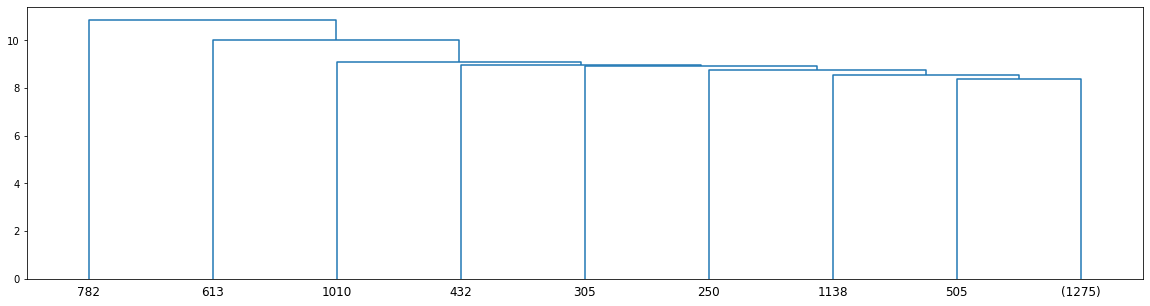

In [87]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='single'), truncate_mode='level', p=7 )

In [88]:
L

array([[9.90000000e+01, 6.96000000e+02, 0.00000000e+00, 2.00000000e+00],
       [8.66000000e+02, 1.28300000e+03, 0.00000000e+00, 3.00000000e+00],
       [1.05000000e+03, 1.28400000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [1.01000000e+03, 2.56100000e+03, 9.07392539e+00, 1.28100000e+03],
       [6.13000000e+02, 2.56200000e+03, 9.99951098e+00, 1.28200000e+03],
       [7.82000000e+02, 2.56300000e+03, 1.08590564e+01, 1.28300000e+03]])

CPU times: user 97.2 ms, sys: 3.63 ms, total: 101 ms
Wall time: 96.7 ms


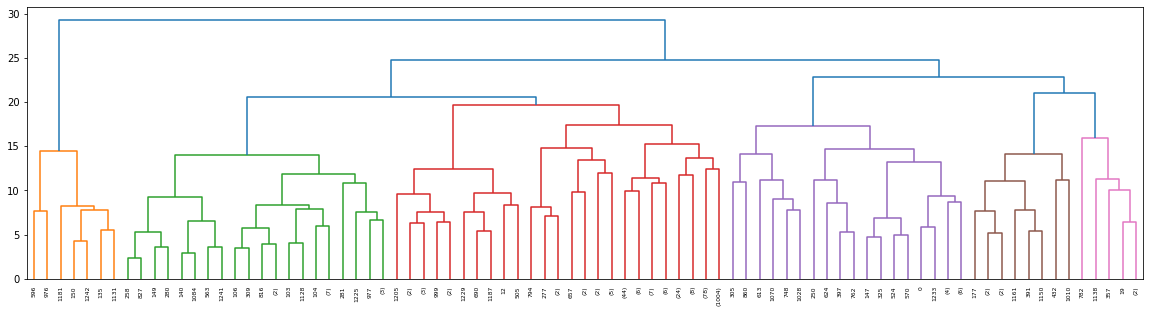

In [72]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='complete'), truncate_mode='level', p=7 )

CPU times: user 64.7 ms, sys: 7.57 ms, total: 72.3 ms
Wall time: 68.6 ms


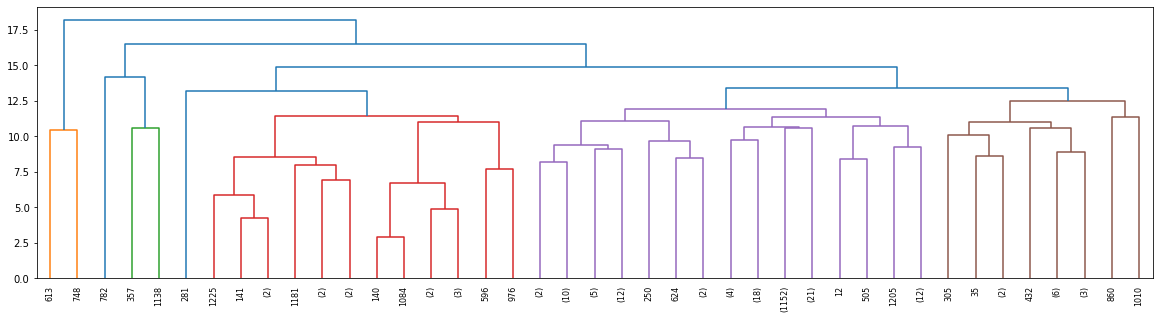

In [73]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='average'), truncate_mode='level', p=7 )

CPU times: user 177 ms, sys: 122 µs, total: 177 ms
Wall time: 174 ms


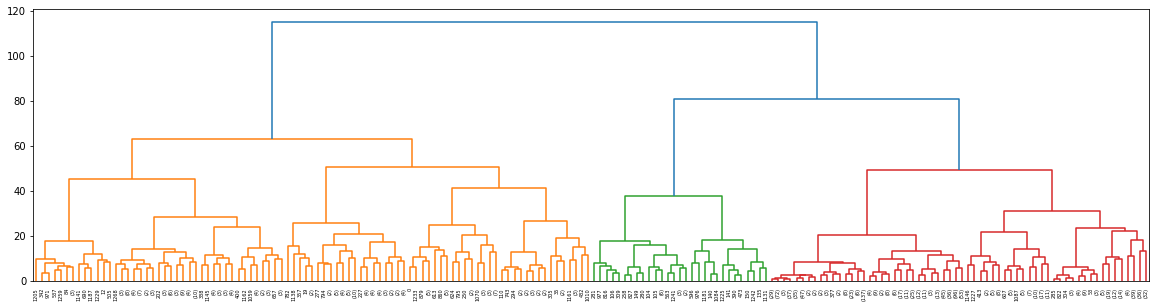

In [89]:
%%time
plt.figure(figsize=(20,5))
dend = hierarchical.dendrogram( hierarchical.linkage(X, method='ward'), truncate_mode='level', p=7 )

- - -

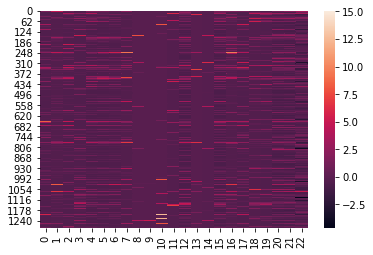

In [85]:
sns.heatmap(X);

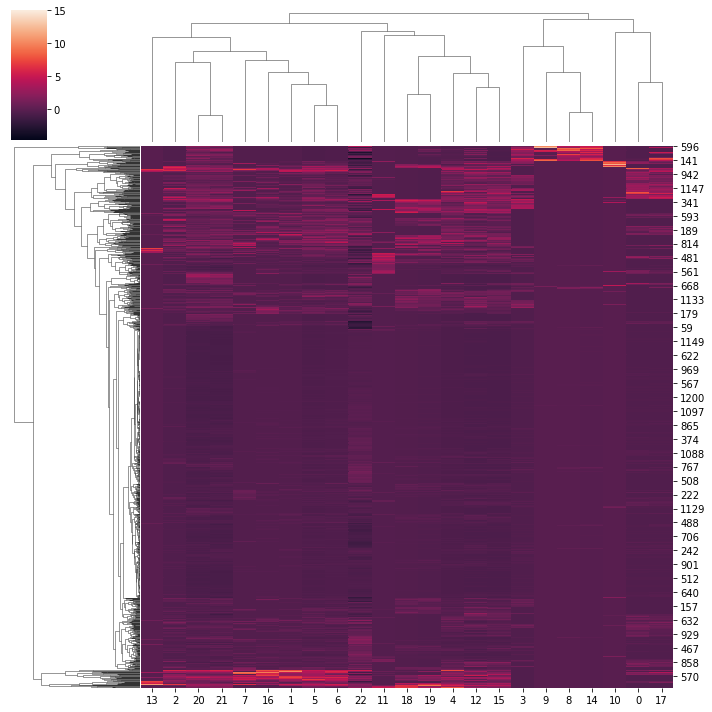

In [86]:
sns.clustermap(X, method='complete');

- - -

In [109]:
analise = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos['pos_first']], axis=1).copy()

In [114]:
aggclu = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggclu.fit_predict(X)

analise['classe'] = aggclu.labels_
analise['cell']   = 1

In [139]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [144]:
ptab = pd.pivot_table(analise, 
                        values  = 'cell', 
                        index   = 'pos_first', 
                        columns = 'classe', 
                        aggfunc = 'count',
                        fill_value = 0.0)
# ptab_perc = ptab.copy()
# ptab_perc.div( ptab.sum(axis=1), axis=0 ).style.apply(highlight_max, axis=1)
ptab.style.apply(highlight_max, axis=0)

classe,0,1,2,3,4,5
pos_first,,,,,,
ATA,16,42,0,42,8,177
GOL,0,0,37,2,0,57
LAT,33,1,0,52,12,102
MEI,38,15,0,81,34,240
TEC,0,0,0,22,0,69
ZAG,24,0,0,60,4,115


# divisive hierarchical

exemplo com **bisecting k-means**:

![https://medium.com/@afrizalfir/bisecting-kmeans-clustering-5bc17603b8a2](../img/bisecting-kmeans.png)

observações:
* pode ser uma boa alternativa ao k-means quando uma de suas hipóteses é violada: observações geradas por **mistura de gaussianas** de **mesma variância**, **mesma quantidade de observações por classe** e **covariância intra-classe nula** (ou seja, matriz covariancia identidade).

## teoria

## codigo

# fuzzy c-means

## teoria

fcm is a method of clustering that allows points to be in more than one cluster a.k.a. soft kmeans

de forma geral, dado o número de clusters $k$ definidos aleatoriamente, o **k-means "normal"** pode ser sistematizado em iterações sobre duas etapas:

1. "atribuição", onde cada ponto $x_i$ é associado a um cluster $k$ de média $m$ de acordo com $$\hat{k}_i = \underset{k}{min} \,\,  d(x_i, m_k)$$ a partir do qual se calcula a probabilidade de $P(x_i \in k) \equiv p_{i}^{k}$ como $$p_{i}^{k} = \left\{\begin{matrix}
1 \, \text{se} \, \hat{k}_i =k\\ 
0 \, \text{se} \, \hat{k}_i \neq k
\end{matrix}\right.$$
2. "atualização", onde os centróides de médias $m$ são recalculados de acordo com $$m_k = \frac{\sum_i p_i^k x_i}{\sum_i p_i^k}$$

<br/>

a partir disso o k-means "normal" (hard k-means) dá origem a uma abordagem de fuzzy c-means (**soft k-means**) redefinindo-se a função probabilidade para $$p_{i}^{k} = \frac{exp\left( -\beta d(x_i, m_k) \right)}{\sum_{k\prime}exp\left( -\beta d(x_i, m_{k\prime}) \right)}$$

## codigo

# mean-shift

## teoria

## codigo

# k-means

## teoria

alguns detalhes sobre k-means estão registrados na seção [fuzzy c-means](#fuzzy-c-means)

## codigo

# dbscan

## teoria

## codigo

- - -

**referencias**

[hierarchical clustering @ statquest](https://www.youtube.com/watch?v=7xHsRkOdVwo)<br/>
[agglomerative clustering @ victor lavrenko](https://www.youtube.com/watch?v=XJ3194AmH40)

<br/>

[choosing the number of clusters in hierarchical agglomerative clustering @ stats exchange](https://stats.stackexchange.com/questions/66128/choosing-the-number-of-clusters-in-hierarchical-agglomerative-clustering)<br/>
[scipy.cluster.hierarchy.linkage @ scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)<br/>
[hierarchical clustering with python and scikit-learn @ stackabuse](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)<br/>
[clustering with scikit with gifs @ dashee87](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

<br/>

[us arrests using hierarchical clustering analysis](https://www.kaggle.com/aishu2218/us-arrests-using-hierarchical-clustering-analysis)